# 数据准备

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist.train
#mnist.validation
#mnist.test

In [6]:
mnist.train.images
#mnist.train.labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


# 建立模型

In [8]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [9]:
# 输入层 x 
x = tf.placeholder("float", [None, 784])

In [10]:
# 隐藏层h1
h1=layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu) 

In [11]:
# 输出层
y_predict=layer(output_dim=10,input_dim=256,
                    inputs=h1,activation=None)

# 定义训练方式

In [12]:
#建立训练数据label真实值 placeholder
y_label = tf.placeholder("float", [None, 10])

In [13]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
#选择optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

# 定义评估模型的准确率的方式

In [17]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [18]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 进行训练

In [29]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize) 
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels}) 
    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.818247795  Accuracy= 0.844
Train Epoch: 02 Loss= 4.219110489  Accuracy= 0.8904
Train Epoch: 03 Loss= 3.220680952  Accuracy= 0.9048
Train Epoch: 04 Loss= 2.619826794  Accuracy= 0.9208
Train Epoch: 05 Loss= 2.225292683  Accuracy= 0.9264
Train Epoch: 06 Loss= 1.987054348  Accuracy= 0.93
Train Epoch: 07 Loss= 1.804653883  Accuracy= 0.9348
Train Epoch: 08 Loss= 1.685198784  Accuracy= 0.936
Train Epoch: 09 Loss= 1.634160399  Accuracy= 0.937
Train Epoch: 10 Loss= 1.475153446  Accuracy= 0.9398
Train Epoch: 11 Loss= 1.490822792  Accuracy= 0.9406
Train Epoch: 12 Loss= 1.393690467  Accuracy= 0.9446
Train Epoch: 13 Loss= 1.372165799  Accuracy= 0.9438
Train Epoch: 14 Loss= 1.335422277  Accuracy= 0.9448
Train Epoch: 15 Loss= 1.230721831  Accuracy= 0.9488
Train Finished takes: 23.18416476249695


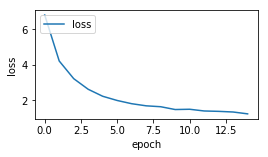

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

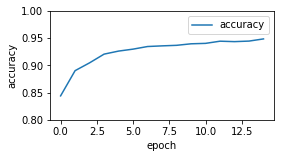

In [36]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 评估模型的准确率

In [37]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.9459


# 进行预测

In [43]:
y_predict_result=sess.run(y_predict,feed_dict={x: mnist.test.images })
y_predict_result

array([[ -69.415     ,  -70.36698   ,   -6.860519  , ...,  117.94503   ,
           0.31906956,    7.345495  ],
       [  11.568829  ,   38.690342  ,  110.47931   , ..., -246.12178   ,
          16.524078  , -171.76001   ],
       [ -49.280163  ,   90.08384   ,  -21.685577  , ...,   -0.8582572 ,
          14.526405  ,   -6.7180815 ],
       ...,
       [-110.26917   ,  -99.95805   ,  -27.592178  , ...,   70.36326   ,
          38.40334   ,   55.480896  ],
       [-123.293304  , -140.18661   , -141.94794   , ..., -125.059006  ,
         -18.499567  ,  -60.091007  ],
       [ -34.575592  ,  -81.72244   ,    9.055845  , ..., -164.68906   ,
         -92.29907   ,  -43.745495  ]], dtype=float32)

In [44]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [45]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [46]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

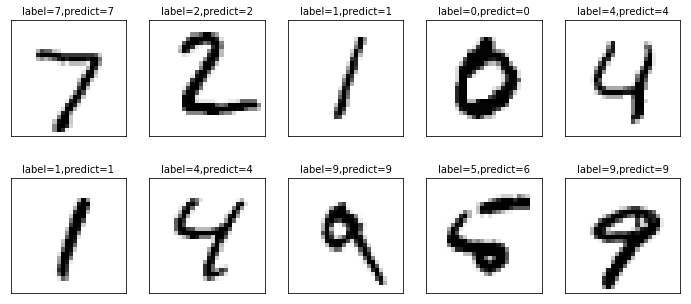

In [47]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

# 找出预测错误

In [48]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 6
i=38   label= 2 predict= 3
i=92   label= 9 predict= 4
i=96   label= 1 predict= 9
i=139   label= 4 predict= 2
i=173   label= 3 predict= 8
i=247   label= 4 predict= 6
i=259   label= 6 predict= 0
i=307   label= 7 predict= 3
i=320   label= 9 predict= 7
i=321   label= 2 predict= 7
i=359   label= 9 predict= 4
i=380   label= 0 predict= 5
i=381   label= 3 predict= 7


# 优化1：隐藏层加入更多神经元

In [1]:
'''
此部分代码重启笔记文件后运行
'''


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

x = tf.placeholder("float", [None, 784])
h1=layer(output_dim=1000,input_dim=784, 
         inputs=x ,activation=tf.nn.relu)  
y_predict=layer(output_dim=10,input_dim=1000,
                    inputs=h1,activation=None)
y_label = tf.placeholder("float", [None, 10])
loss_function = tf.reduce_mean(
          tf.nn.softmax_cross_entropy_with_logits
                       (logits=y_predict , 
                        labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [2]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 8.972184181  Accuracy= 0.8864
Train Epoch: 02 Loss= 5.821687698  Accuracy= 0.9184
Train Epoch: 03 Loss= 4.675118923  Accuracy= 0.9286
Train Epoch: 04 Loss= 4.065425396  Accuracy= 0.9374
Train Epoch: 05 Loss= 3.731010199  Accuracy= 0.9374
Train Epoch: 06 Loss= 3.606521845  Accuracy= 0.9368
Train Epoch: 07 Loss= 3.128480196  Accuracy= 0.9446
Train Epoch: 08 Loss= 2.954912424  Accuracy= 0.9468
Train Epoch: 09 Loss= 2.880429983  Accuracy= 0.9494
Train Epoch: 10 Loss= 2.747786283  Accuracy= 0.951
Train Epoch: 11 Loss= 2.846567392  Accuracy= 0.9492
Train Epoch: 12 Loss= 2.763641119  Accuracy= 0.9508
Train Epoch: 13 Loss= 2.761315584  Accuracy= 0.9532
Train Epoch: 14 Loss= 2.577345848  Accuracy= 0.9554
Train Epoch: 15 Loss= 2.671435833  Accuracy= 0.9566
Train Finished takes: 37.860496520996094


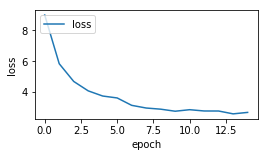

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

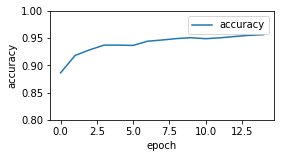

In [4]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [7]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images, 
                                      y_label: mnist.test.labels}))

Accuracy: 0.9567


In [8]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [9]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

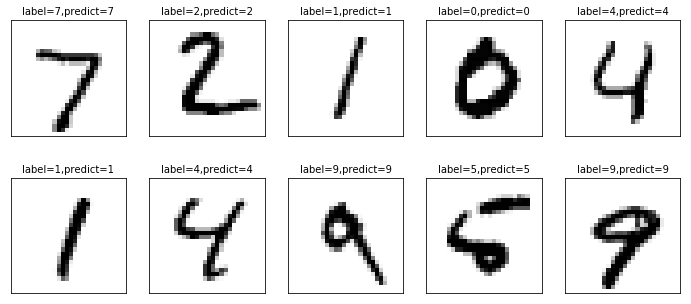

In [11]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

# 优化2：建立包含两个隐藏层的多层感知器模型

In [24]:
'''
此部分代码重启笔记文件后运行
'''
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

SyntaxError: invalid syntax (<ipython-input-24-84ae39de776b>, line 1)

In [2]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

x = tf.placeholder("float", [None, 784])
# 建立隐藏层1
h1=layer(output_dim=1000,input_dim=784, 
         inputs=x ,activation=tf.nn.relu) 
# 建立隐藏层2
h2=layer(output_dim=1000,input_dim=1000, 
         inputs=h1 ,activation=tf.nn.relu)  
y_predict=layer(output_dim=10,input_dim=1000, 
                    inputs=h1,activation=None)
y_label = tf.placeholder("float", [None, 10])
loss_function = tf.reduce_mean(
          tf.nn.softmax_cross_entropy_with_logits
                       (logits=y_predict , 
                        labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 8.725341797  Accuracy= 0.8862
Train Epoch: 02 Loss= 5.958590031  Accuracy= 0.9128
Train Epoch: 03 Loss= 4.666420937  Accuracy= 0.9232
Train Epoch: 04 Loss= 3.985986710  Accuracy= 0.9322
Train Epoch: 05 Loss= 3.334068775  Accuracy= 0.9406
Train Epoch: 06 Loss= 3.106446505  Accuracy= 0.9444
Train Epoch: 07 Loss= 2.917261600  Accuracy= 0.9452
Train Epoch: 08 Loss= 2.823459864  Accuracy= 0.9466
Train Epoch: 09 Loss= 2.603723526  Accuracy= 0.95
Train Epoch: 10 Loss= 2.747402430  Accuracy= 0.9496
Train Epoch: 11 Loss= 2.524978161  Accuracy= 0.952
Train Epoch: 12 Loss= 2.640682459  Accuracy= 0.9506
Train Epoch: 13 Loss= 2.510450363  Accuracy= 0.9554
Train Epoch: 14 Loss= 2.627793312  Accuracy= 0.9554
Train Epoch: 15 Loss= 2.264807463  Accuracy= 0.9594
Train Finished takes: 39.082679271698


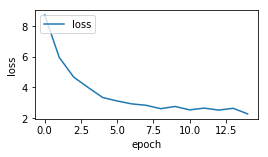

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

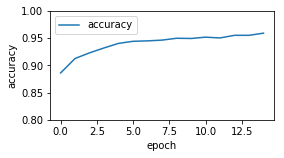

In [17]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [19]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images, 
                                      y_label: mnist.test.labels}))

Accuracy: 0.9586


In [20]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })


In [21]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

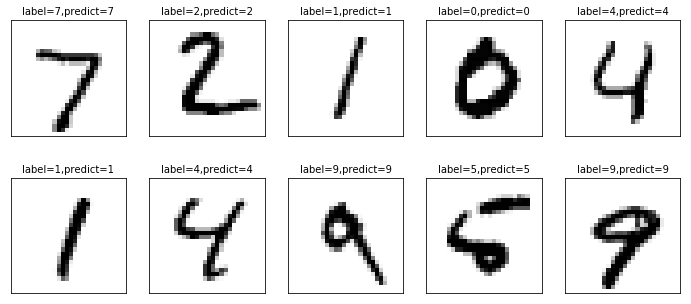

In [23]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)